# Sentence Embeddings using Siamese BERT-Networks
---
This Google Colab Notebook illustrates using the Sentence Transformer python library to quickly create BERT embeddings for sentences and perform fast semantic searches.

The Sentence Transformer library is available on [pypi](https://pypi.org/project/sentence-transformers/) and [github](https://github.com/UKPLab/sentence-transformers). The library implements code from the ACL 2019 paper entitled "[Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://www.aclweb.org/anthology/D19-1410.pdf)" by Nils Reimers and Iryna Gurevych.


## Install Sentence Transformer Library

In [1]:
!conda install -c conda-forge sentence-transformers -y

Solving environment: done

# All requested packages already installed.



## Load the BERT Model

In [2]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import pytorch_cos_sim
import numpy as np
#np.corrcoef(sentence_embeddings).shape

import matplotlib.pyplot as plt
%matplotlib inline
# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 
# Semantic Textual Similarity are available https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/sts-models.md

model = SentenceTransformer('stsb-mpnet-base-v2')


## Setup a Corpus

In [3]:
### image

sentences2 = ['I like my phone',
'Your cellphone looks great',
'Will it snow tomorrow?',
'Hurricanes have hit the US',
'How old are you?',
'what is your age?',
"Nicotine in vapes can disrupt neurotransmitters in the brain, making teens feel 'off'.",
"Vape flavoring popular with kids and young adults is cardiotoxic and disrupts the heart's normal activity.",
"E-cigarette aerosol contains toxic chemicals like those found in glue and paint.",
"Vapes and e-cigarettes increase your risk of developing lung cancer, particularly if you use them for a long time.",
"Vaping is risky and addictive. Nicotine is highly addictive and is very addictive to the brain. It is not a healthy alternative to smoking and can lead to serious health problems.",
"Vaping is anything but harmless and there's a lot of debate about the safety of the products. So, if you're still thinking of giving it a try, we suggest you do it with caution."]

sentence_embeddings2 = model.encode(sentences2)


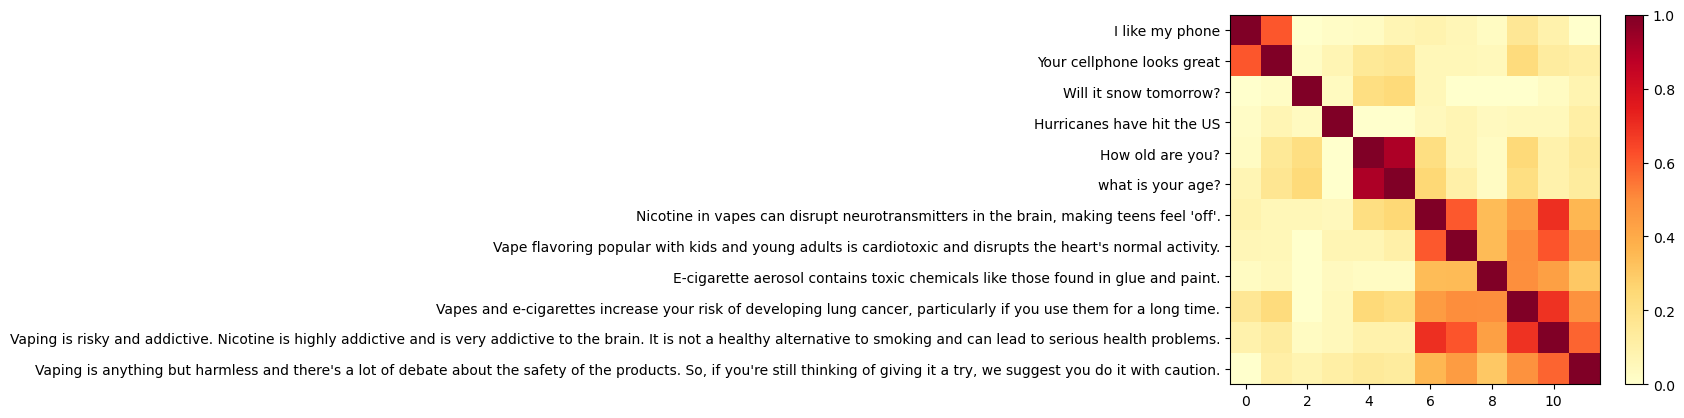

In [4]:
matcos2 = np.zeros((len(sentences2),len(sentences2)))
for i in range(len(sentences2)):
  for j in range (len(sentences2)):
    matcos2[i,j] = pytorch_cos_sim(sentence_embeddings2[i,:], sentence_embeddings2[j,:])

#np.fill_diagonal(matcos2, np.NaN)


fig, ax = plt.subplots()
im = ax.imshow(matcos2, cmap = 'YlOrRd', vmin = 0, vmax = 1);

ax.set_yticks(np.arange(len(sentences2)))
ax.set_yticklabels(sentences2)

fig.colorbar(im, ax=ax)
plt.show()

In [5]:
# A corpus is a list with documents split by sentences.

#top 15 are AI-gen (with prompts), bottom 15 are human

sentences = ["Nicotine in vapes is a very dangerous chemical, but it's still legal to vape in most states. But if you vape nicotine, you are putting yourself at risk for lung cancer, heart disease, and other deadly health problems",
             "Nicotine in vapes is far more potent than in cigarettes, which is why it is so addictive. Many vapers are addicted to their vapes because of the nicotine content. The nicotine in vape juice is so addictive that many vapers do not want to stop smoking",
             "Nicotine in vapes is a highly addictive substance. Nicotine is the main ingredient in most e-liquids, and it can be found in the form of nicotine salts, nicotine-free, and nicotine blends. Some vapes have nicotine concentrations as high as 20mg",
             "The substances in e-cigarettes and their vapor include a mixture of nicotine, propylene glycol, glycerol, flavorings, and other chemicals. The nicotine and propylene glycol can be toxic. Vaping of nicotine-containing products is associated with an increased risk of lung disease, including chronic obstructive pulmonary disease (COPD)",
             "The substances in e-cigarettes and their vapor include chemicals that can harm the lungs. These chemicals are the same as those found in tobacco smoke, which can cause lung disease and even cancer. The chemical nicotine is a highly addictive substance that can cause dependence and addiction",
             "The substances in e-cigarettes and their vapor include chemicals and toxins that can harm your lungs. Many of the chemicals in e-cigarettes have been linked to lung disease and other health issues.E-cigarettes and their vapors are a dangerous and addictive substitute for smoking cigarettes. They are not safe for use by anyone",
             "Vapes and e-cigarettes increase your risk of cancer, heart disease, and stroke. They are also associated with a number of respiratory illnesses, including asthma and pneumonia",
             "Vapes and e-cigarettes increase your risk of developing lung cancer, particularly if you use them for a long time",
             "Vapes and e-cigarettes increase your risk of lung cancer by 50 percent. The same goes for the second-hand smoke you inhale. E-cigarettes can cause heart attacks. The chemicals in e-cigarettes can cause the blood vessels to narrow, leading to heart attacks",
             "Vaping is anything but harmless. It can be harmful to your wellness. It is a well known fact that there are many folks who are suffering from respiratory illnesses and other serious conditions because of the use of e-cigs",
             "Vaping is anything but harmless. The liquid in the vape juice is made up of harmful chemicals, and when you vape them, you are inhaling these chemicals into your lungs. This can lead to a host of serious health problems, including lung cancer, heart disease, and respiratory disorders",
             "Vaping is anything but harmless and there's a lot of debate about the safety of the products. So, if you're still thinking of giving it a try, we suggest you do it with caution",
             "Vaping is risky, as well as vaping is extremely addictive. You should always keep in mind that you are placing your health in danger when you are vaping. If you are a smoker, then you should think twice before you start vaping",
             "Vaping is risky for your health. It is a way of inhaling a vapor, which is produced by heating the liquid in the tank or cartridge. This can cause a variety of issues, including lung damage, and it is not recommended for anyone under the age of 18",
             "Vaping is risky and addictive. Nicotine is highly addictive and is very addictive to the brain. It is not a healthy alternative to smoking and can lead to serious health problems",
             "Nicotine in vapes can disrupt neurotransmitters in the brain, making teens feel 'off.'",
             "Vaping is risky. E-cigarettes are highly addictive and have been found to contain metals and chemicals known to cause lung damage. Also, vapes with THC are a felony and will wreck a student's future",
             "Its so freeing and fulfilling once you stop craving vapes. Like toxic relationships, youll think you cant live without it or feel like you dont wanna live without it. But once you do its amazing",
             "Vapes and e-cigarettes increase your risk of asthma, chronic lung disease, and heart attack while exposing you to toxic chemicals",
             "Nicotine is highly addictive, and comes in many forms, including a variety of e-cigarettes. Nicotine is especially dangerous for teens and young adults because it negatively affects brain development",
             "Vaping is anything but harmless. Know the risks. Harmful chemicals go into your lungs causing lung disease & the same nicotine as cigarettes is highly addicting & stunts brain growth. Talk to your kids about the dangers",
             "I havent vaped in 3 days because I found out nicotine affects your spinal discs and you could be bed bound by 30",
             "Vape flavoring popular with kids and young adults is cardiotoxic and disrupts the heart's normal activity",
             "In some cartridges of vapes, the concentration of nicotine can be equivalent to a pack of cigarettes, or some of them even a pack and a half",
             "Vapers are twice as likely to suffer a stroke as traditional smokers and three times as likely as those who don't smoke at all",
             "E-cigarette aerosol contains toxic chemicals like those found in glue and paint",
             "The substances in e-cigarettes and their vapor include dangerous chemicals such as anti-freeze, diethylene glycol, and nitrosamines, which have the potential to cause cancer",
             "The aerosol produced by e-cigarettes, including the nicotine, kid-friendly flavorings and other chemicals, can be breathed in by bystanders",
             "With a raging fever, vomiting and diarrhea, Gregory Rodriguez thought he had some kind of bug when he checked himself into the emergency room. 22 years old and on the brink of death from vaping",
             "Vaping is still here, and its even worse for those who catch the coronavirus. Vaping additive blamed for outbreak produces 'exceptionally toxic' by-products"
            ]

# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings = model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [-3.22179236e-02  9.58628580e-02  3.13444086e-03 -1.53409302e-01
  1.12943187e-01  2.53521442e-01 -1.25929788e-01 -8.41176976e-03
  4.62568142e-02 -5.73497228e-02  8.61273259e-02  7.71743804e-02
  6.66721985e-02  2.63567626e-01  1.41785845e-01 -3.48757543e-02
  7.22813159e-02  2.62372587e-02  8.67063627e-02  1.01845026e-01
 -2.37214938e-02  6.45801947e-02 -2.04152092e-02  2.37314731e-01
  1.40037268e-01  2.94909403e-02  9.52402800e-02  4.84701954e-02
  1.06866276e-02 -1.56294450e-01  1.30148143e-01 -3.31621431e-02
 -2.16062199e-02  5.91177680e-02  1.91145726e-02  1.22756138e-01
  1.12839788e-02  2.11474039e-02 -2.82652285e-02 -1.78564146e-01
  2.77807862e-01  5.72031736e-02 -7.87556246e-02  4.68860455e-02
  3.82593125e-02 -1.90352276e-01  1.41196012e-01 -1.76718339e-01
  1.36030450e-01  1.80834867e-02 -4.36562970e-02 -1.01865921e-02
  9.99890044e-02  4.69192676e-02  2.34837264e-01  1.

In [6]:
sentence_embeddings.shape

(30, 768)

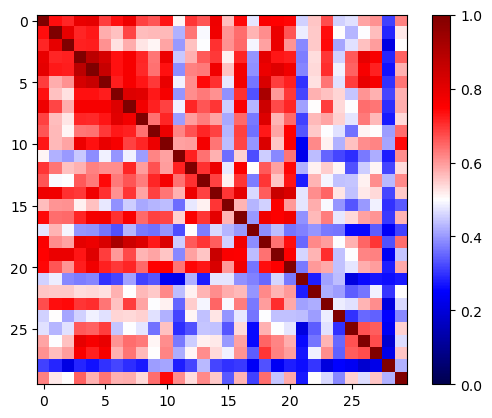

In [7]:
plt.imshow(np.corrcoef(sentence_embeddings)[:, :], cmap = 'seismic', vmin = 0, vmax = 1);
plt.colorbar()

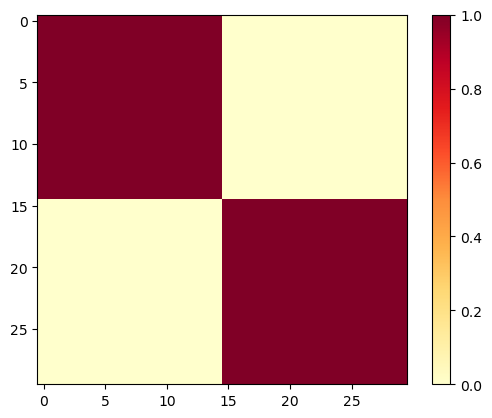

In [8]:
hypo = np.zeros((30,30))
hypo[:15,:15] = 1
hypo[15:,15:] = 1
plt.imshow(hypo, cmap = 'YlOrRd', vmin = 0, vmax = 1);
plt.colorbar()

In [9]:
mat = np.corrcoef(sentence_embeddings)

m1 = mat[:30, :30]
m1.shape

(30, 30)

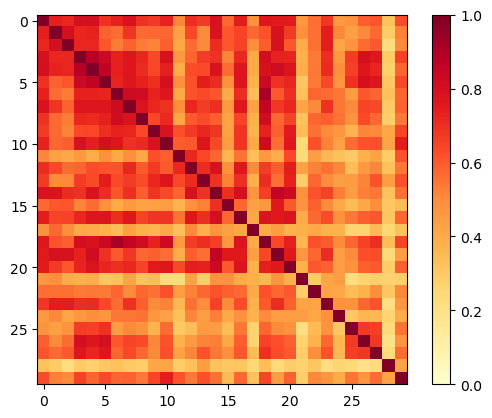

array([[1.        , 0.99999786],
       [0.99999786, 1.        ]])

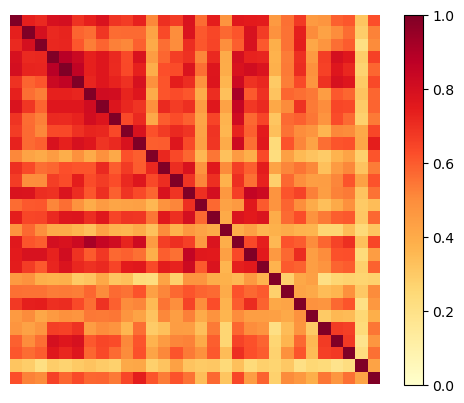

In [10]:
matcos = np.zeros((30,30))
for i in range(30):
  for j in range (30):
    matcos[i,j] = pytorch_cos_sim(sentence_embeddings[i,:], sentence_embeddings[j,:])

plt.imshow(matcos, cmap = 'YlOrRd', vmin = 0, vmax = 1);
plt.colorbar()
plt.show()

plt.imshow(np.corrcoef(sentence_embeddings)[:, :], cmap = 'YlOrRd', vmin = 0, vmax = 1);
plt.colorbar()
import seaborn as sns

sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

import nilearn.connectome

cos = nilearn.connectome.sym_matrix_to_vec(matcos, discard_diagonal=True)
cor = nilearn.connectome.sym_matrix_to_vec(mat, discard_diagonal=True)
np.corrcoef(cos, cor)

In [11]:
import nilearn.connectome
aigens = nilearn.connectome.sym_matrix_to_vec(matcos[:15, :15], discard_diagonal=True)
humans = nilearn.connectome.sym_matrix_to_vec(matcos[15:, 15:], discard_diagonal=True)
aitohum = nilearn.connectome.sym_matrix_to_vec(matcos[15:, :15], discard_diagonal=True)

print(np.mean(aigens))
print(np.mean(humans))
print(np.mean(aitohum))


0.6666009020237695
0.46885804732640585
0.5589927542777289


In [12]:
aimeans  =  np.nanmean(matcos[:15, :15], axis = 0)
hummeans =  np.nanmean(matcos[15:, 15:], axis = 0)
aitohummeans  =  np.nanmean(matcos[15:, :15], axis = 0)

print(np.mean(aimeans))
print(np.mean(hummeans))
print(np.mean(aitohummeans))

from scipy import stats
print(stats.ttest_ind(aimeans, hummeans))
print(stats.ttest_ind(aimeans, aitohummeans))
print(stats.ttest_ind(aitohummeans, hummeans))


0.6888275106747945
0.5042675060696072
0.5576431555880441
Ttest_indResult(statistic=7.3723655226603695, pvalue=4.992561902341004e-08)
Ttest_indResult(statistic=7.04999791784411, pvalue=1.1423798581698868e-07)
Ttest_indResult(statistic=2.121132964300961, pvalue=0.04289826272594845)


In [13]:
np.nanmean(matcos)

0.5770953319801224

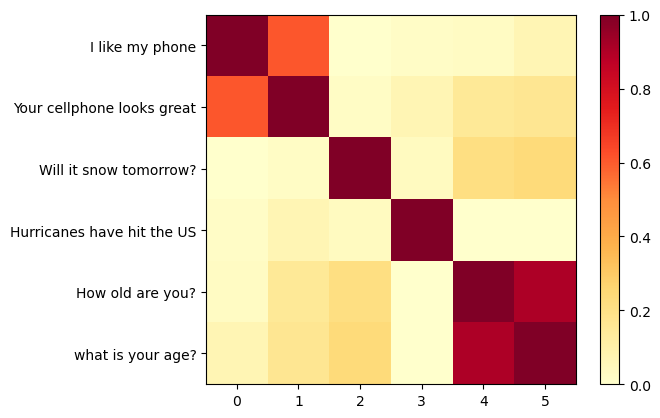

In [14]:
### image

sentences2 = ['I like my phone',
'Your cellphone looks great',
'Will it snow tomorrow?',
'Hurricanes have hit the US',
'How old are you?',
'what is your age?',]

sentence_embeddings2 = model.encode(sentences2)

matcos2 = np.zeros((len(sentences2),len(sentences2)))
for i in range(len(sentences2)):
  for j in range (len(sentences2)):
    matcos2[i,j] = pytorch_cos_sim(sentence_embeddings2[i,:], sentence_embeddings2[j,:])

#np.fill_diagonal(matcos2, np.NaN)


fig, ax = plt.subplots()
im = ax.imshow(matcos2, cmap = 'YlOrRd', vmin = 0, vmax = 1);

ax.set_yticks(np.arange(len(sentences2)))
ax.set_yticklabels(sentences2)

fig.colorbar(im, ax=ax)
plt.show()


## Perform Semantic Search

In [15]:
import scipy
#@title Sematic Search Form

# code adapted from https://github.com/UKPLab/sentence-transformers/blob/master/examples/application_semantic_search.py

query = 'Nobody has sane thoughts' #@param {type: 'string'}

queries = [query]
query_embeddings = model.encode(queries)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
number_top_matches = 5 #@param {type: "number"}

print("Semantic Search Results")

for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Cosine Score: %.4f)" % (1-distance))

Semantic Search Results




Query: Nobody has sane thoughts

Top 5 most similar sentences in corpus:
Nicotine in vapes can disrupt neurotransmitters in the brain, making teens feel 'off.' (Cosine Score: 0.1358)
Vaping is anything but harmless and there's a lot of debate about the safety of the products. So, if you're still thinking of giving it a try, we suggest you do it with caution (Cosine Score: 0.1354)
Vapers are twice as likely to suffer a stroke as traditional smokers and three times as likely as those who don't smoke at all (Cosine Score: 0.0825)
Vape flavoring popular with kids and young adults is cardiotoxic and disrupts the heart's normal activity (Cosine Score: 0.0781)
Its so freeing and fulfilling once you stop craving vapes. Like toxic relationships, youll think you cant live without it or feel like you dont wanna live without it. But once you do its amazing (Cosine Score: 0.0711)
